In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("heartData.csv")

In [3]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [42]:
data.shape

(4240, 16)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [44]:
data.dropna(axis=0, inplace=True)

In [45]:
data.shape

(3658, 16)

In [46]:
X = data.drop("TenYearCHD", axis=1)
y = data["TenYearCHD"]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [48]:
X_train.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
1085,0,55,1.0,1,10.0,0.0,0,0,0,346.0,131.0,81.0,22.69,75.0,77.0
1881,0,55,1.0,0,0.0,0.0,0,0,0,310.0,135.0,76.5,26.31,110.0,74.0
4083,0,46,2.0,0,0.0,0.0,0,0,0,247.0,115.0,71.0,27.72,82.0,69.0
4225,1,45,4.0,1,43.0,0.0,0,0,0,216.0,137.5,85.0,24.24,83.0,105.0
1652,0,39,3.0,0,0.0,0.0,0,0,0,195.0,119.0,84.0,24.60,65.0,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,1,54,3.0,1,20.0,0.0,0,1,0,298.0,133.0,84.0,25.59,90.0,94.0
2870,1,63,1.0,1,43.0,0.0,0,1,0,253.0,172.0,82.0,24.19,66.0,137.0
3990,0,55,2.0,0,0.0,0.0,0,0,0,266.0,131.0,76.0,26.45,72.0,84.0
1789,0,46,2.0,0,0.0,0.0,0,1,0,264.0,150.0,99.0,26.67,80.0,102.0


In [50]:
from sklearn.model_selection import StratifiedShuffleSplit

In [51]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=10)

In [92]:
for train_index, test_index in split.split(data, data["TenYearCHD"]):
    strat_train_set = data.iloc[train_index]
    strat_test_set = data.iloc[test_index]

In [96]:
strat_test_set["TenYearCHD"].value_counts()/len(strat_test_set)

0    0.848361
1    0.151639
Name: TenYearCHD, dtype: float64

In [95]:
strat_train_set["TenYearCHD"].value_counts()/len(strat_train_set)

0    0.847573
1    0.152427
Name: TenYearCHD, dtype: float64

In [97]:
print(strat_train_set.shape)
print(strat_test_set.shape)

(2926, 16)
(732, 16)


In [99]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [100]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [101]:
#top features :- Age, TotChol, SysBP, DiaBP, BMI, Heart rate, Glucose, Gender

In [102]:
X_train = strat_train_set.drop("TenYearCHD", axis=1)
y_train = strat_train_set["TenYearCHD"]

In [103]:
X_test = strat_test_set.drop("TenYearCHD", axis=1)
y_test = strat_test_set["TenYearCHD"]

In [64]:
#grid search for optimum parameters
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10)

In [65]:
svm_clf.fit(X_train,y_train)
svm_clf.best_params_

{'C': 0.001, 'gamma': 0.001}

In [104]:
svm_clf = SVC(C=10, gamma=1, probability=True)

In [105]:
svm_clf.fit(X_train, y_train)

SVC(C=10, gamma=1, probability=True)

In [106]:
p = svm_clf.predict(X_test)

In [70]:
X_train_x = X_train[imp_features]

In [81]:
X_test_x = X_test[imp_features]

In [72]:
svm_clf_x = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10)

In [73]:
svm_clf_x.fit(X_train_x, y_train)
svm_clf_x.best_params_

{'C': 0.001, 'gamma': 0.001}

In [82]:
# predictions
svm_predict = svm_clf.predict(X_test)
svm_predict_x = svm_clf_x.predict(X_test_x)

In [83]:
accuracy_score(y_test, svm_predict)

0.8333333333333334

In [84]:
print(svm_predict.shape)
print(svm_predict_x.shape)
print(y_test.shape)

(732,)
(732,)
(732,)


In [85]:
accuracy_score(y_test, svm_predict_x)

0.8333333333333334

<AxesSubplot:>

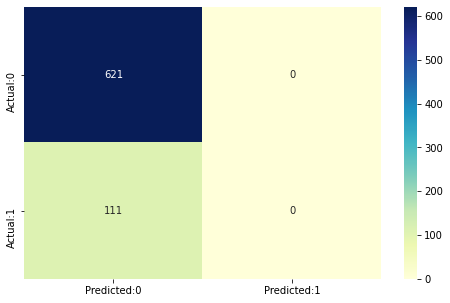

In [107]:
cm=confusion_matrix(y_test,p)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [90]:
y_train.value_counts()

0    2491
1     435
Name: TenYearCHD, dtype: int64

In [91]:
y_test.value_counts()

0    610
1    122
Name: TenYearCHD, dtype: int64

### Scaling the data

In [108]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [109]:
svm_clf = SVC(C=10, gamma=1, probability=True)

In [111]:
svm_clf.fit(X_train_scaled, y_train)

SVC(C=10, gamma=1, probability=True)

In [112]:
pred = svm_clf.predict(X_test_scaled)

<AxesSubplot:>

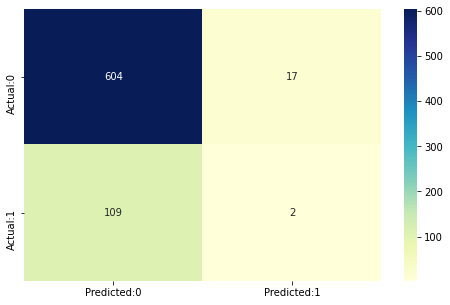

In [113]:
cm=confusion_matrix(y_test,pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [114]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_x)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test_x)
X_test = pd.DataFrame(X_test_scaled)

In [127]:
svm_clf = SVC(C=10, gamma=2, probability=True)

In [128]:
svm_clf.fit(X_train, y_train)

SVC(C=20, gamma=2, probability=True)

In [129]:
pred = svm_clf.predict(X_test_scaled)

<AxesSubplot:>

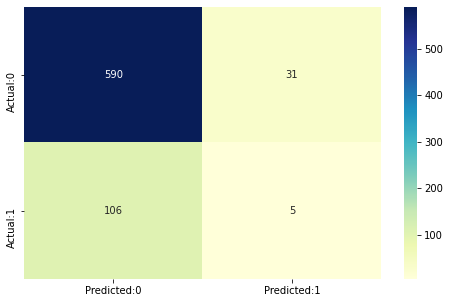

In [130]:
cm=confusion_matrix(y_test,pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

### Removing Data Biasing i.e Balancing the data

In [4]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [8]:
data = data.dropna()

In [9]:
imp_features = ["age", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose", "male"]
X = data[imp_features]
y = data.iloc[:,-1]

In [10]:
# the numbers before smote
num_before = dict(Counter(y))

#perform smoting

# define pipeline
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(X, y)


#the numbers after smote
num_after =dict(Counter(y_smote))

In [11]:
print(num_before)

{0: 3101, 1: 557}


In [12]:
print(num_after)

{0: 3100, 1: 2480}


In [13]:
X_smote.head(1)

,age,totChol,sysBP,diaBP,BMI,heartRate,glucose,male
0,59,260.0,162.5,105.0,24.39,75.0,72.0,0


In [14]:
n_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
n_data.columns = ["age", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose", "male", "TenYearCHD"]
n_data.head()

,age,totChol,sysBP,diaBP,BMI,heartRate,glucose,male,TenYearCHD
0,59,260.0,162.5,105.0,24.39,75.0,72.0,0,0
1,40,188.0,105.0,65.0,21.15,58.0,70.0,0,0
2,42,183.0,120.0,76.0,21.12,100.0,72.0,0,0
3,61,206.0,130.0,80.0,21.93,72.0,82.0,0,0
4,40,237.0,112.5,77.5,23.58,75.0,84.0,0,0


In [15]:
n_data["TenYearCHD"].value_counts()

0    3100
1    2480
Name: TenYearCHD, dtype: int64

In [16]:
X_n = n_data.drop("TenYearCHD",axis=1)
y_n = n_data["TenYearCHD"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_n, y_n, test_size=0.2, random_state=10)

In [18]:
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_scaled_train)

In [19]:
X_scaled_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_scaled_test)

In [152]:
X_train.head(1)

,0,1,2,3,4,5,6,7
0,-0.485245,-0.587626,-0.174273,0.844772,-0.470154,-0.519322,-0.24646,1.200839


In [153]:
X_test.head(1)

,0,1,2,3,4,5,6,7
0,0.468211,1.207435,0.442197,1.083871,1.384373,1.049587,-0.266972,-0.832751


In [154]:
#grid search for optimum parameters
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10)

In [155]:
svm_clf.fit(X_train,y_train)
svm_clf.best_params_

{'C': 10, 'gamma': 1}

In [156]:
pred = svm_clf.predict(X_test)
accuracy_score(y_test, pred)

0.8557347670250897

<AxesSubplot:>

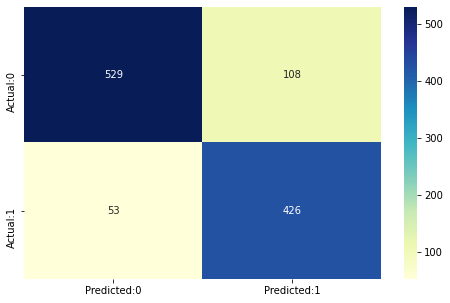

In [157]:
cm=confusion_matrix(y_test,pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [158]:
svm_clf

GridSearchCV(cv=10, estimator=SVC(probability=True),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1]})

In [159]:
svm_clf_s = SVC(gamma=1, C=10, random_state=10)

In [160]:
svm_clf_s.fit(X_train, y_train)

SVC(C=10, gamma=1, random_state=10)

In [161]:
pred_s = svm_clf.predict(X_test)

In [162]:
accuracy_score(y_test, pred_s)

0.8557347670250897

<AxesSubplot:>

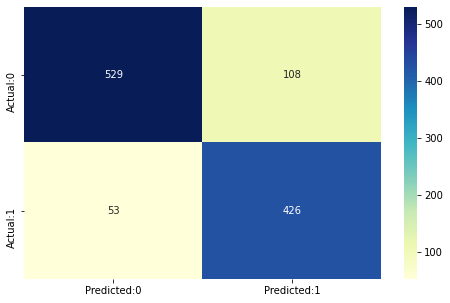

In [164]:
cm=confusion_matrix(y_test,pred_s)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [165]:
f1_score(y_test, pred_s)

0.84106614017769

### Saving the model

In [25]:
import pickle

In [168]:
# save the model to disk
filename = 'SVM_final.sav'
pickle.dump(svm_clf_s, open(filename, 'wb'))

In [20]:
#"age", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose", "male", "TenYearCHD"
i = [[61,225,150,95,28.58,65,103,0]]

In [22]:
t = scaler.transform(i)

In [23]:
t

array([[ 1.19468621, -0.32359493,  0.58391765,  0.84847552,  0.62605552,
        -0.93581185,  0.64980319, -0.81664901]])

In [28]:
with open('SVM_final.sav', 'rb') as file:
        heart = pickle.load(file)

In [30]:
pred = heart.predict(t)

In [31]:
pred

array([1])

In [33]:
filename_s = 'Scaler.pkl'
pickle.dump(scaler, open(filename_s, 'wb'))